In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Open the JSON file
with open('data_parsed.json', 'r') as f:
    # Load the JSON data into a Python dictionary
    data = json.load(f)

synthetic_data = pd.read_json("data_parsed.json")

In [3]:
# Schema Validation

In [4]:
# Are all columns present?
expected_schema = {
    "Name": str,
    "Age": int,
    "Gender": str,
    "Blood Type": str,
    "Medical Condition": str,
    "Date of Admission": str,
    "Doctor": str,
    "Hospital": str,
    "Insurance Provider": str,
    "Billing Amount": float,
    "Room Number": int,
    "Admission Type": str,
    "Discharge Date": str,
    "Medication": str,
    "Test Results": str
}

for column, expected_type in expected_schema.items():
    if column not in synthetic_data.columns:
        print(f"Missing column: {column}")
    else:
        if not synthetic_data[column].map(lambda x: isinstance(x, expected_type)).all():
            print(f"Column {column} contains incorrect data type!")

Column Doctor contains incorrect data type!
Column Billing Amount contains incorrect data type!
Column Room Number contains incorrect data type!
Column Medication contains incorrect data type!
Column Test Results contains incorrect data type!


In [6]:
# Calculate percentage of incorrect data types per column
def calculate_incorrect_data_types(dataframe, schema):
    results = {}
    for column, expected_type in schema.items():
        if column not in dataframe.columns:
            results[column] = "Missing column"
        else:
            incorrect_count = dataframe[column].apply(lambda x: not isinstance(x, expected_type)).sum()
            total_count = len(dataframe[column])
            percentage_incorrect = (incorrect_count / total_count) * 100
            results[column] = f"{percentage_incorrect:.2f}% incorrect data types"
    return results

# Validate synthetic data
validation_results = calculate_incorrect_data_types(synthetic_data, expected_schema)

# Print results
for column, result in validation_results.items():
    print(f"{column}: {result}")


Name: 0.00% incorrect data types
Age: 0.00% incorrect data types
Gender: 0.00% incorrect data types
Blood Type: 0.00% incorrect data types
Medical Condition: 0.00% incorrect data types
Date of Admission: 0.00% incorrect data types
Doctor: 1.00% incorrect data types
Hospital: 0.00% incorrect data types
Insurance Provider: 0.00% incorrect data types
Billing Amount: 100.00% incorrect data types
Room Number: 100.00% incorrect data types
Admission Type: 0.00% incorrect data types
Discharge Date: 0.00% incorrect data types
Medication: 0.10% incorrect data types
Test Results: 0.20% incorrect data types


In [7]:
synthetic_data["Billing Amount"] = pd.to_numeric(synthetic_data["Billing Amount"], errors='coerce')
synthetic_data["Room Number"] = pd.to_numeric(synthetic_data["Room Number"], errors='coerce').astype('Int64')


In [8]:
synthetic_data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Eva Martins,34,female,O,hypertension,2023-08-15,Dr. Patel,City General Hospital,United Healthcare,12000.0,205,urgent,2023-08-20,amlodipine,blood pressure high
1,Jamal Okafor,50,male,A,type 2 diabetes,2023-09-10,Dr. Ramirez,Metropolitan Health Center,Cigna,14500.0,312,elective,2023-09-15,metformin,HbA1c high
2,Sophia Wu,65,female,B,coronary artery disease,2023-06-12,Dr. Chen,Heartland Care Center,Blue Cross,22500.0,104,urgent,2023-06-18,atorvastatin,cholesterol high
3,Liam Neeson,29,male,AB,flu,2023-10-03,Dr. Kim,Eastside Clinic,United Healthcare,3000.0,22,emergency,2023-10-05,antivirals,viral test positive
4,Amina Collins,82,female,O,alzhemier's disease,2023-05-20,Dr. Nguyen,Shady Grove Hospital,Cigna,18500.0,310,elective,2023-06-15,donepezil,cognitive test decline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Juan Gomez,29,male,B,appendicitis,2023-10-03,Dr. Alvarez,General Hospital,United Healthcare,9000.0,305,emergency,2023-10-07,pain relief,Appendix inflamed
999,Mia Chen,16,female,A,asthma,2023-03-18,Dr. Johnson,Children's Health Center,Kaiser Permanente,2300.0,128,urgent,2023-03-21,inhalers,Lung function test low
1000,Nora Fischer,72,other,O,heart failure,2023-01-05,Dr. Rivera,Cardiac Care Institute,Humana,30000.0,513,urgent,2023-01-20,beta-blockers,Ejection fraction low
1001,Tom Sanders,42,male,AB,migraine,2023-08-02,Dr. Smith,Neurology Clinic,Cigna,1600.0,211,elective,2023-08-04,sumatriptan,Neuro exam negative


In [9]:
# Calculate percentage of incorrect data types per column
def calculate_incorrect_data_types(dataframe, schema):
    results = {}
    for column, expected_type in schema.items():
        if column not in dataframe.columns:
            results[column] = "Missing column"
        else:
            incorrect_count = dataframe[column].apply(lambda x: not isinstance(x, expected_type)).sum()
            total_count = len(dataframe[column])
            percentage_incorrect = (incorrect_count / total_count) * 100
            results[column] = f"{percentage_incorrect:.2f}% incorrect data types"
    return results

# Validate synthetic data
validation_results = calculate_incorrect_data_types(synthetic_data, expected_schema)

# Print results
for column, result in validation_results.items():
    print(f"{column}: {result}")


Name: 0.00% incorrect data types
Age: 0.00% incorrect data types
Gender: 0.00% incorrect data types
Blood Type: 0.00% incorrect data types
Medical Condition: 0.00% incorrect data types
Date of Admission: 0.00% incorrect data types
Doctor: 1.00% incorrect data types
Hospital: 0.00% incorrect data types
Insurance Provider: 0.00% incorrect data types
Billing Amount: 0.00% incorrect data types
Room Number: 100.00% incorrect data types
Admission Type: 0.00% incorrect data types
Discharge Date: 0.00% incorrect data types
Medication: 0.10% incorrect data types
Test Results: 0.20% incorrect data types


In [10]:
# Are the dates valid? Discharge date is greater than or equal to admission date

# Replace 'date_column1' and 'date_column2' with your actual column names
admission_date = 'Date of Admission'
discharge_date = 'Discharge Date'

# Ensure the columns are in datetime format
synthetic_data[admission_date] = pd.to_datetime(synthetic_data[admission_date])
synthetic_data[discharge_date] = pd.to_datetime(synthetic_data[discharge_date])

# Check where date_column1 is greater than date_column2
condition_met = synthetic_data[discharge_date] > synthetic_data[admission_date]

# Calculate the percentage
percentage = (condition_met.sum() / len(synthetic_data)) * 100

print(f"The percentage of rows where {discharge_date} > {admission_date} is {percentage:.2f}%")


The percentage of rows where Discharge Date > Date of Admission is 99.70%


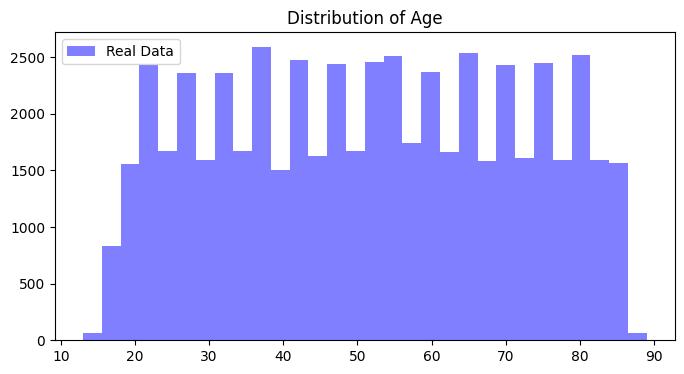

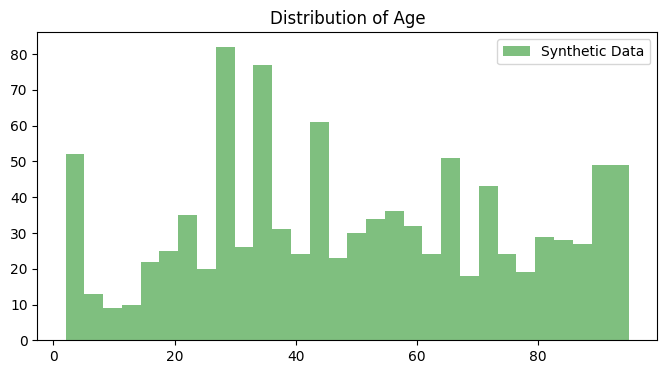

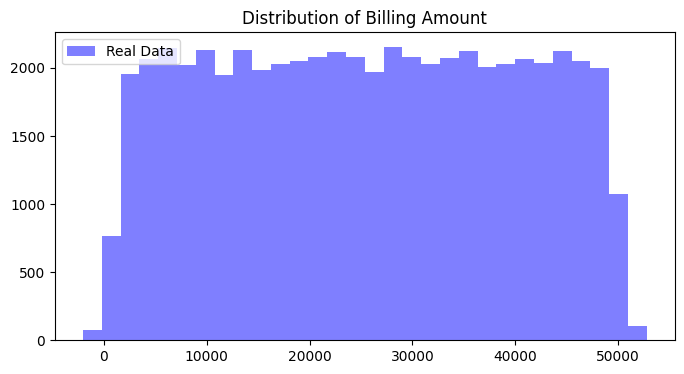

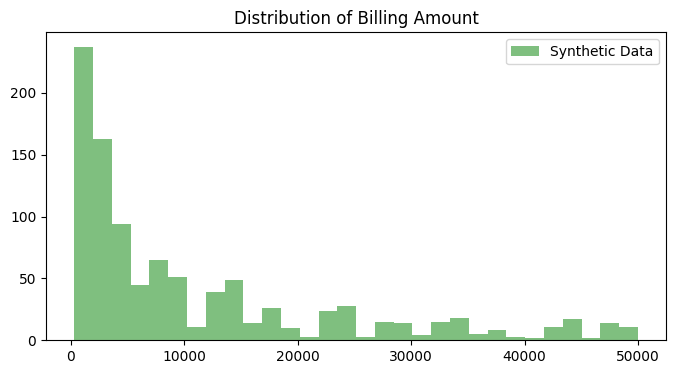

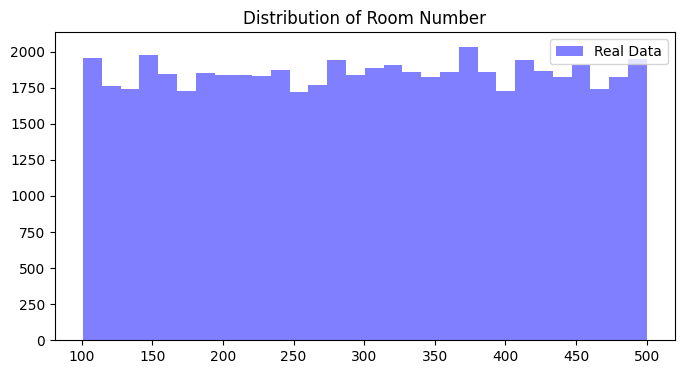

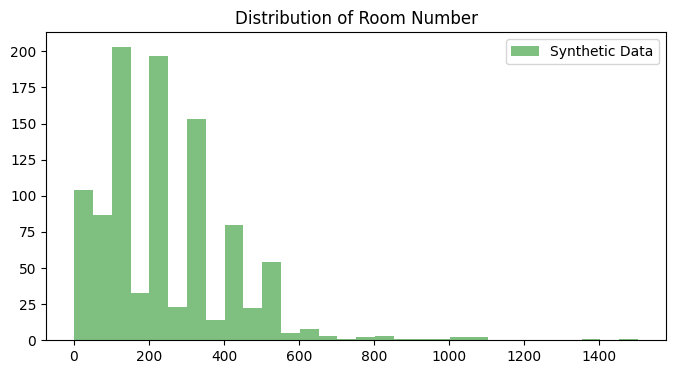

In [11]:
import matplotlib.pyplot as plt

# Load the real dataset
real_data = pd.read_csv("../datasets/healthcare_dataset.csv")

# Compare distributions
numerical_columns = ["Age", "Billing Amount", "Room Number"]

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(real_data[column], bins=30, alpha=0.5, label="Real Data", color='blue')
    # plt.hist(synthetic_data[column], bins=30, alpha=0.5, label="Synthetic Data")
    plt.title(f"Distribution of {column}")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 4))
    # plt.hist(real_data[column], bins=30, alpha=0.5, label="Real Data")
    plt.hist(synthetic_data[column], bins=30, alpha=0.5, label="Synthetic Data", color='green')
    plt.title(f"Distribution of {column}")
    plt.legend()
    plt.show()

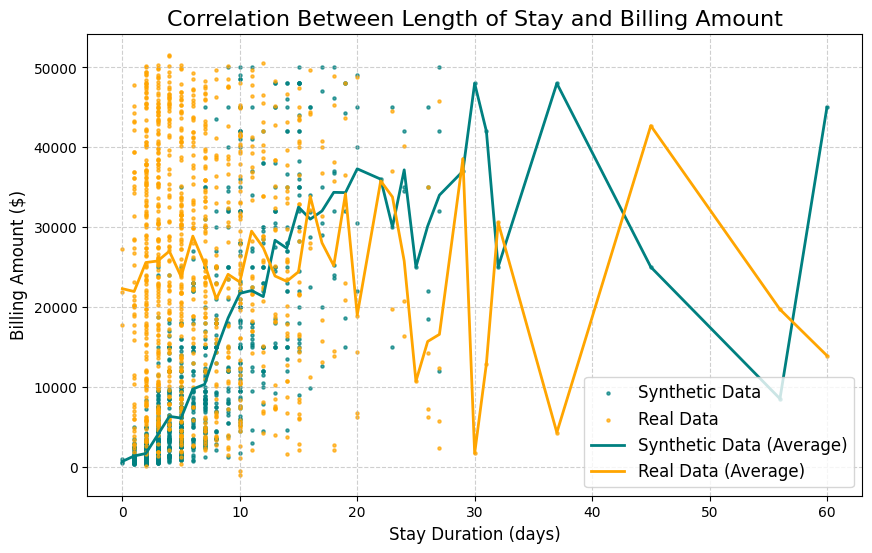

In [12]:
# Calculate duration of stay in days
synthetic_data['Stay Duration'] = (synthetic_data[discharge_date] - synthetic_data[admission_date]).dt.days

# For comparison with real data
real_data[admission_date] = pd.to_datetime(synthetic_data[admission_date])
real_data[discharge_date] = pd.to_datetime(synthetic_data[discharge_date])
real_data['Stay Duration'] = (real_data[discharge_date] - real_data[admission_date]).dt.days

# Combined Scatter Plot
plt.figure(figsize=(10, 6))

# Scatter plot for synthetic data
plt.scatter(
    synthetic_data['Stay Duration'], 
    synthetic_data['Billing Amount'], 
    alpha=0.7, 
    color='teal', 
    label='Synthetic Data',
    s=5
)

# Scatter plot for real data
plt.scatter(
    real_data['Stay Duration'], 
    real_data['Billing Amount'], 
    alpha=0.7, 
    color='orange', 
    label='Real Data',
    s=5
)

# Calculate averages
synthetic_avg = synthetic_data.groupby('Stay Duration')['Billing Amount'].mean()
real_avg = real_data.groupby('Stay Duration')['Billing Amount'].mean()

# Line plot for synthetic data
plt.plot(
    synthetic_avg.index, 
    synthetic_avg.values, 
    color='teal', 
    label='Synthetic Data (Average)', 
    linewidth=2
)

# Line plot for real data
plt.plot(
    real_avg.index, 
    real_avg.values, 
    color='orange', 
    label='Real Data (Average)', 
    linewidth=2
)

# Adding titles and labels
plt.title('Correlation Between Length of Stay and Billing Amount', fontsize=16)
plt.xlabel('Stay Duration (days)', fontsize=12)
plt.ylabel('Billing Amount ($)', fontsize=12)

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adding legend
plt.legend(fontsize=12)

# Show the plot
plt.show()


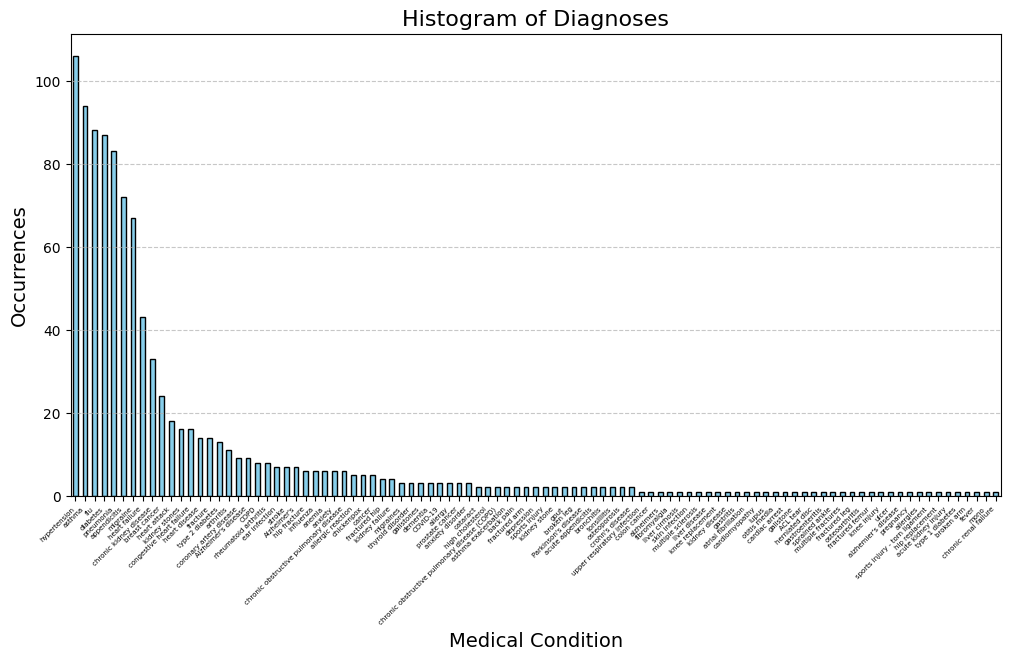

In [17]:
plt.figure(figsize=(12, 6))
synthetic_data['Medical Condition'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Diagnoses', fontsize=16)
plt.xlabel('Medical Condition', fontsize=14)
plt.ylabel('Occurrences', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
plt.show()

Column: Age
  Jensen-Shannon Divergence: 0.477381929291011


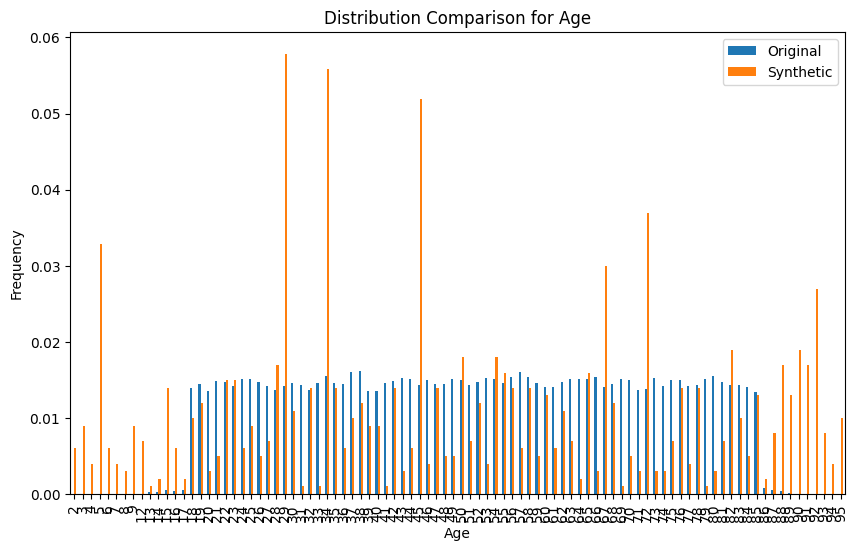

Column: Gender
  Jensen-Shannon Divergence: 0.9999999999999999


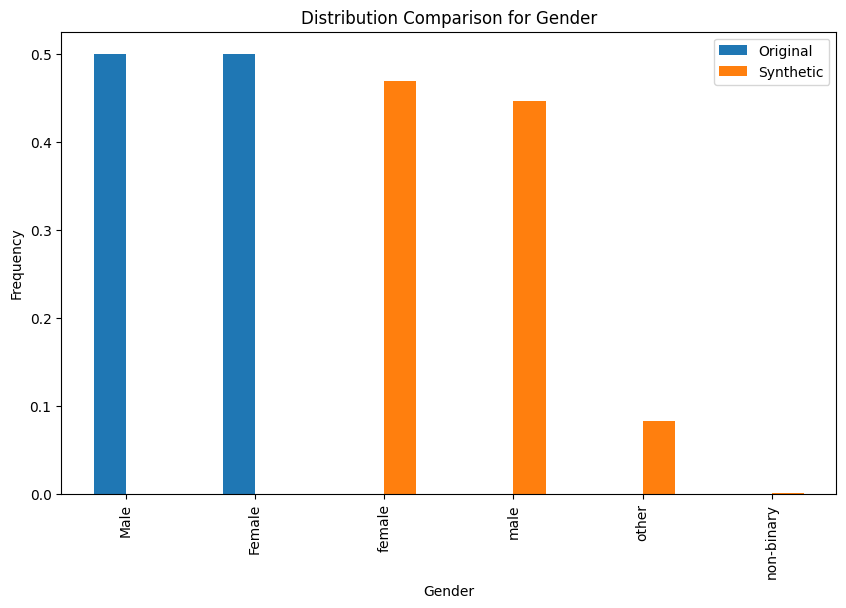

Column: Blood Type
  Jensen-Shannon Divergence: 1.0


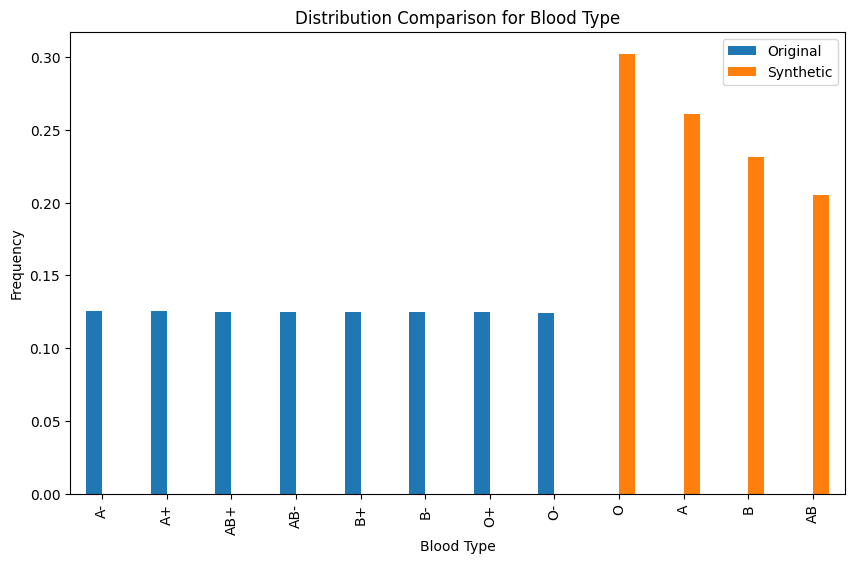

Column: Medical Condition
  Jensen-Shannon Divergence: 1.0


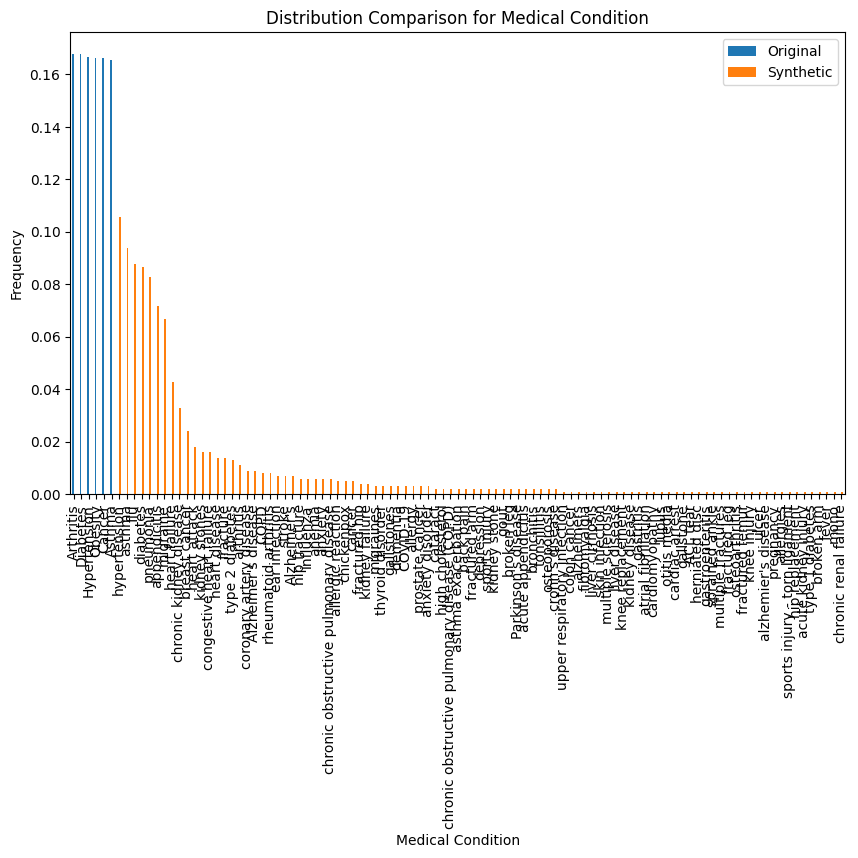

Column: Insurance Provider
  Jensen-Shannon Divergence: 0.6278809931540628


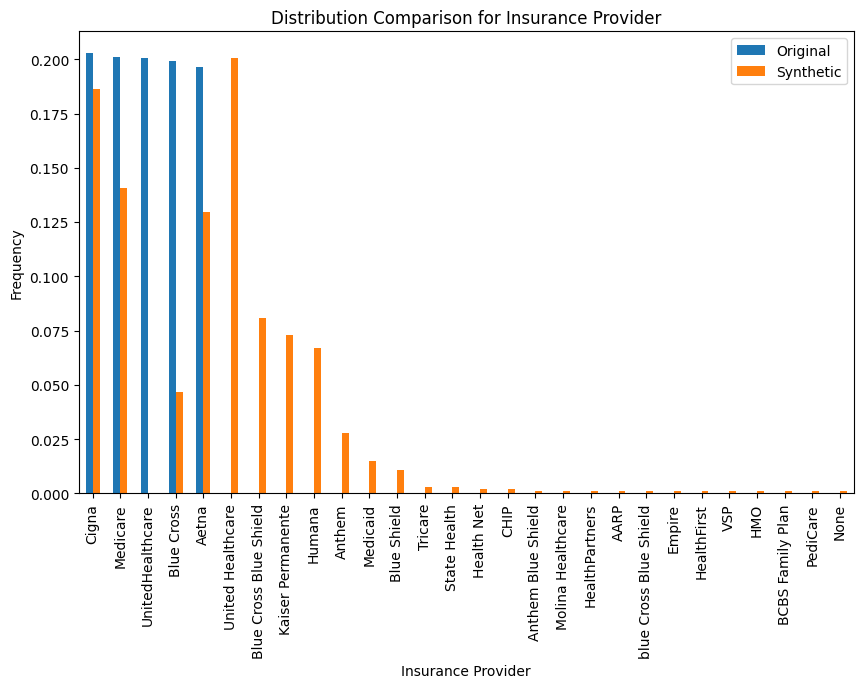

Column: Admission Type
  Jensen-Shannon Divergence: 1.0


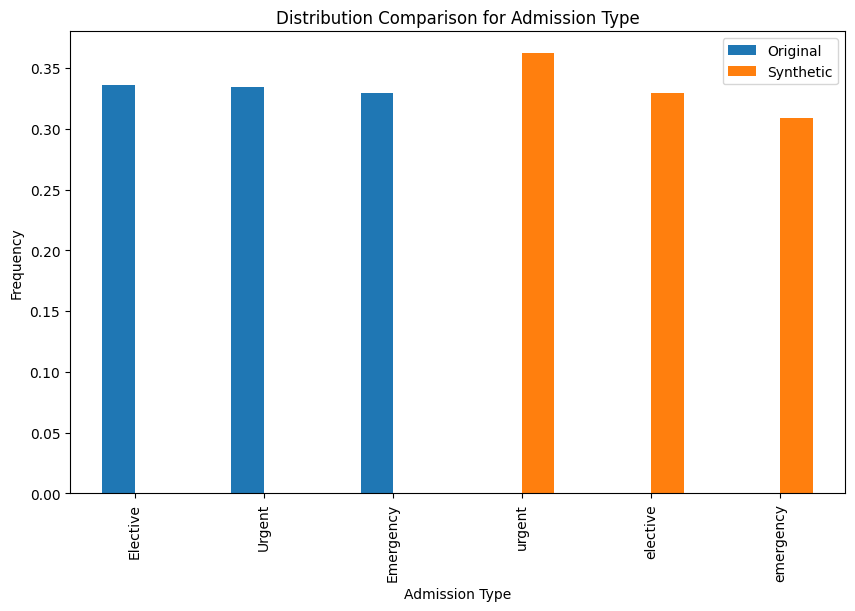

Column: Medication
  Jensen-Shannon Divergence: 0.9959519699961069


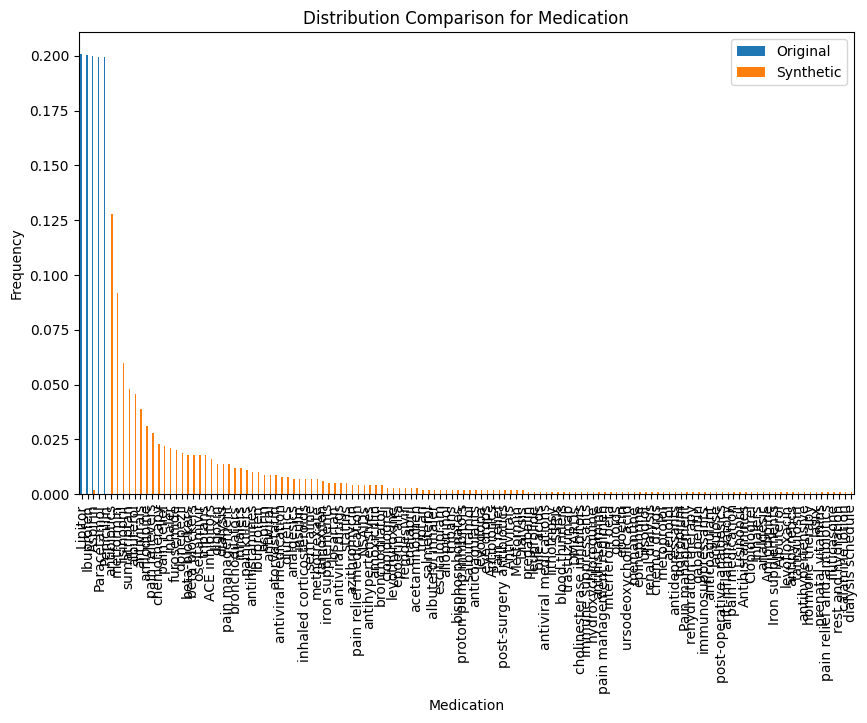

Column: Stay Duration
  Jensen-Shannon Divergence: 0.0


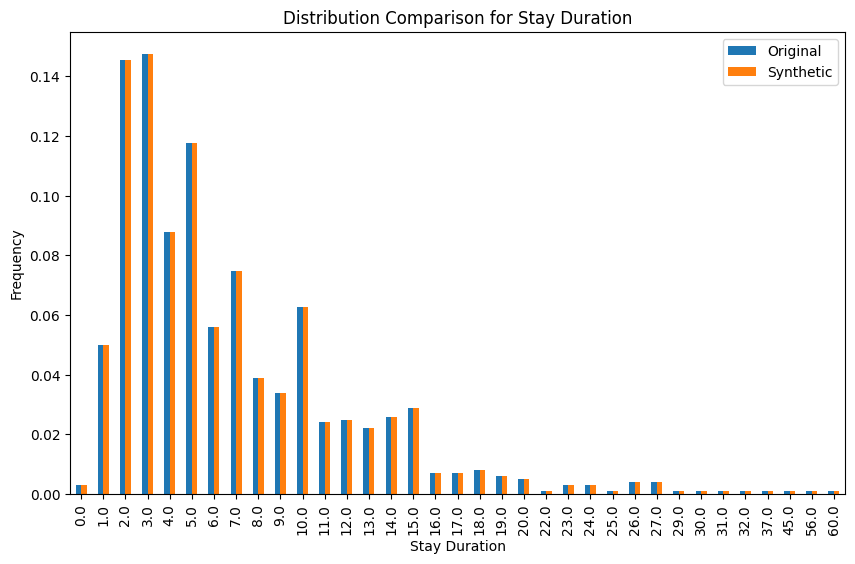

In [30]:
def is_hashable(value):
    try:
        hash(value)
        return True
    except TypeError:
        return False

# Diversity analysis function with filtering for unhashable values
def analyze_column_diversity_with_filter(col_name, original, synthetic):
    # Filter out unhashable values
    original_filtered = original[original[col_name].apply(is_hashable)]
    synthetic_filtered = synthetic[synthetic[col_name].apply(is_hashable)]

    # Compute normalized value counts
    original_counts = original_filtered[col_name].value_counts(normalize=True)
    synthetic_counts = synthetic_filtered[col_name].value_counts(normalize=True)

    # Align the indices of the two distributions
    aligned_counts = pd.concat([original_counts, synthetic_counts], axis=1, keys=["original", "synthetic"]).fillna(0)

    # Sort by index if the column is numeric
    if pd.api.types.is_numeric_dtype(original_filtered[col_name]):
        aligned_counts = aligned_counts.sort_index()

    # Calculate Jensen-Shannon Divergence
    js_divergence = jensenshannon(aligned_counts["original"], aligned_counts["synthetic"], base=2)
    print(f"Column: {col_name}")
    print(f"  Jensen-Shannon Divergence: {js_divergence}")

    # Plot the distributions
    aligned_counts.plot(kind="bar", figsize=(10, 6))
    plt.title(f"Distribution Comparison for {col_name}")
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.legend(["Original", "Synthetic"])
    plt.show()

# Apply the updated function to each column
for column in ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Stay Duration']:
    analyze_column_diversity_with_filter(column, real_data, synthetic_data)